In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from PIL import Image, ImageOps

In [2]:
cube = np.load('npz/seistrain1.npz')['arr_0']
masks = np.load('npz/faulttrain1.npz')['arr_0']
xlines, inlines, depth = np.shape(cube)
print(f"Кросслайны - {xlines}\nИнлайны - {inlines}\nГлубина - {depth}")

Кросслайны - 100
Инлайны - 3174
Глубина - 1537


# Взятие срезов

In [3]:
def show_slice_mask(cube_slice, mask):
    fig = plt.figure(figsize=(10, 10))
    rows = 1
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(cube_slice, cmap='gray')
    plt.axis('off')
    fig.add_subplot(rows, columns, 2)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()

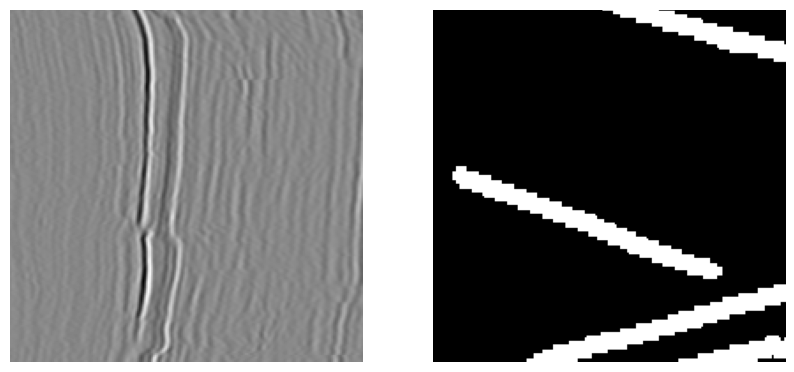

In [4]:
show_slice_mask(cube[30, 600:800, 800:1000], masks[30, 600:800, 800:1000])

In [5]:
def get_slice(cube, masks, slice_size, threshold,
              xlines_window, inlines_window, timelines_window):
    """
    Получить случайный срез с заданным пороговым значением
    """
    while True:
        random_xline = randint(xlines_window[0],
                                      xlines_window[1])
        random_inline = randint(inlines_window[0],
                                       inlines_window[1])
        random_depth = randint(timelines_window[0],
                                         timelines_window[1])
        
        random_cube_slice = cube[random_xline,
                                 random_inline:random_inline + slice_size,
                                 random_depth:random_depth + slice_size]
        random_mask = masks[random_xline,
                           random_inline:random_inline + slice_size,
                           random_depth:random_depth + slice_size]
        if np.sum(random_mask) > threshold:
            return random_cube_slice, random_mask

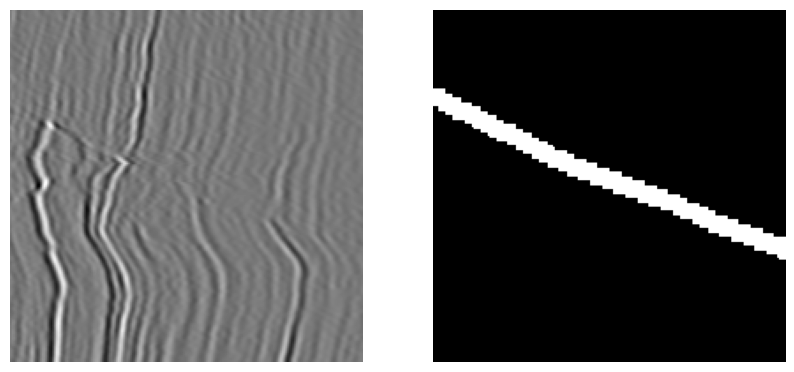

In [6]:
slice_size = 150
cube_slice, mask = get_slice(cube, masks, 200, 1500,
                             (0, 80),
                             (0, inlines - slice_size),
                             (0, depth - slice_size))
show_slice_mask(cube_slice, mask)

# Генерация датасета

In [7]:
for i in range(1000):
    cube_slice, mask = get_slice(cube,
                                  masks,
                                  200,
                                  1500,
                                  (0, 80),
                                  (0, inlines - slice_size),
                                  (0, depth - slice_size))

    cube_img = Image.fromarray(np.uint8(cube_slice * 255), mode='L')
    mask_img = Image.fromarray(mask).convert('RGB')
    cube_img.save(f"data/slice/{i}.jpeg")
    mask_img.save(f"data/mask/{i}.jpeg")

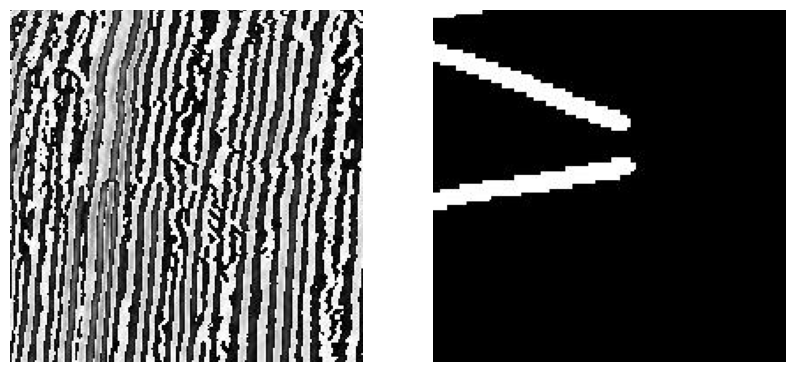

In [8]:
num = randint(0, 1000)
slice_img = Image.open(f"data/slice/{num}.jpeg")
mask_img = im = Image.open(f"data/mask/{num}.jpeg")
show_slice_mask(slice_img, mask_img)